In [ ]:
import tensorflow as tf
import numpy as np
import random

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2


(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)

print(x_train.shape)


y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


In [ ]:
#Sequentially accumulate layer
model = Sequential()
#CNN input layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape = (32,32,3),activation='elu',kernel_regularizer=L2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='elu',kernel_regularizer=L2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',kernel_regularizer=L2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256,kernel_size=(3,3),activation='elu',kernel_regularizer=L2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
#Flatttening layer
model.add(Flatten())
model.add(Dense(512,activation='elu',kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
model.add(Dense(512,activation='elu',kernel_initializer='glorot_normal'))
model.add(Dropout(0.5))
#output layer
model.add(Dense(10,activation = 'softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),loss = 'categorical_crossentropy',metrics=['accuracy'])
model.summary()

CNN layer 구성 및 fully connected layer 구성 (Dropout rate 0.5)

In [ ]:
hist = model.fit(x_train,y_train,batch_size=256,epochs=100,validation_data=(x_test,y_test))

In [ ]:
eval = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.6913 - accuracy: 0.8463


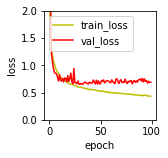

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'],'y',label = 'train_loss')
plt.plot(hist.history['val_loss'],'r',label='val_loss')

plt.ylim([0.0,2.0])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(loc='upper left')

plt.show()

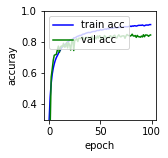

In [ ]:
plt.plot(hist.history['accuracy'], 'b', label='train acc')
plt.plot(hist.history['val_accuracy'], 'g', label='val acc')

plt.ylim([0.3, 1.0])

plt.xlabel('epoch')
plt.ylabel('accuray')

plt.legend(loc='upper left')

plt.show()

예측: 고양이 / 정답: 고양이


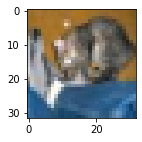

예측: 배 / 정답: 배


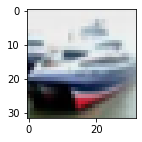

예측: 배 / 정답: 배


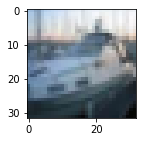

예측: 비행기 / 정답: 비행기


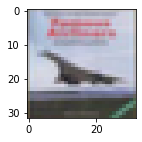

예측: 개구리 / 정답: 개구리


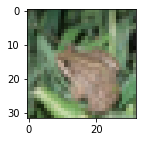

예측: 개구리 / 정답: 개구리


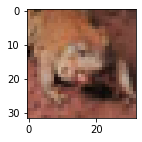

예측: 자동차 / 정답: 자동차


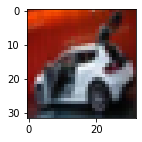

예측: 개구리 / 정답: 개구리


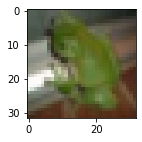

예측: 고양이 / 정답: 고양이


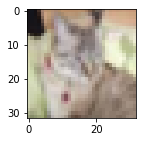

예측: 자동차 / 정답: 자동차


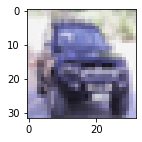

In [ ]:
labels = ['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'boat', 'truck']

plt.rcParams["figure.figsize"] = (2,2)

for i in range(10):

  output = model.predict(x_test[i].reshape(1,32,32,3))
  

  plt.imshow(x_test[i].reshape(32,32,3))

  print('예측: ' + labels[np.argmax(output)] + ' / 정답: ' + labels[np.argmax(y_test[i])])
  plt.show()